# Team Project in Python

Members: Anamika Mishra and Rohit Jayakumar Nair.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [43]:
#******************************Data Wrangling**********************************

#Load the Data
# Read the CSV File Using Pandas read_csv function
path='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/tmdb_movies_data.csv'
Movies = pd.read_csv(path)
Movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [44]:
#Summary of the movies dataset
#Check the datatype of the columns to determine anomalies and datatype discrepencies
Movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [45]:

#We can see that release date is an object in the dataset, which should be in the datetime format
#Changing the datatype of the variable
Movies['release_date'] = pd.to_datetime(Movies['release_date'])
Movies['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [46]:
#Analyze the data distribution of numerical features using describe function
Movies.describe()

#We can see that the variables contain null values. The total null values can be determined as:
#count total rows in each column which contain null values
Movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [47]:
#To avoid data loss, we are filling the null values with 0
Movies.fillna(0)
print()

#Drop unnecessary and insignificant columns
#We can see that there are variables in the dataset with maximum null values. These variables can be excluded from the dataset as they do not significantly contribute towards efficient analysis

Movies.drop(['revenue_adj','overview','budget_adj','homepage','tagline','imdb_id'],axis =1,inplace = True)
#Validate the shape after removing insignificant columns
Movies.shape


(10866, 15)

In [48]:
#Check for duplicate data using duplicated method
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = Movies[Movies.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows except first occurrence based on all columns are :
         id  popularity    budget  revenue original_title  \
2090  42194     0.59643  30000000   967000         TEKKEN   

                                                   cast          director  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                               keywords  runtime  \
2090  martial arts|dystopia|based on video game|mart...       92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  
2090   2010-03-20         110           5.0          2010  


In [49]:
#Remove duplicate rows
Movies.drop_duplicates(inplace = True)

In [50]:
#Analyze the data distribution using describe function
Movies.describe()

#from the below statistics, we can say the budget column has maximum values as 0 (~50% of the values).
#Also, ~50% of the revenue variable value is 0.

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [70]:
#For further analysis, let's count the number of observations with a zero revenue and budget values.
print('Total zero values in budget' , Movies['budget'].isin([0]).sum())
print('Total zeros values in revenue',Movies['revenue'].isin([0]).sum())

Total zero values in budget 5696
Total zeros values in Movies 6016


In [81]:
#Ratio of complete and incomplete observations w.r.t revenue and budget columns
Trows,Tcols = Movies.shape
print('Approximately',(Movies['budget'].isin([0]).sum()/Trows)*100,'% of the budget is 0')
print('Approximately',(Movies['revenue'].isin([0]).sum()/Trows)*100,'% of the revenue is 0')


Approximately 0.0 % of the budget is 0
Approximately 0.0 % of the revenue is 0


In [82]:
#Removing observations with zero revenue and budget values
Movies = Movies[(Movies[['revenue','budget']] != 0).all(axis=1)]
Movies.shape

(3854, 15)

Text(0, 0.5, 'Number Of Movies')

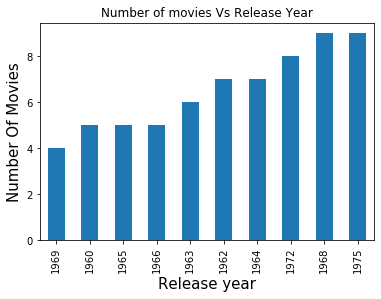

In [117]:
#Exploratory Data Analysis can be used to answer preliminary business queries, 
#understand data distribution in details and to further tune the data for predictive analysis
#Analyze the trend of movie releases from 1960 - 2015

#To achieve this objective , we will group the dataset based on release date and count the number of movies
Movies.groupby('release_year').count()['id'].sort_values()[:10].plot( kind='bar', title='Number of movies Vs Release Year')
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15)


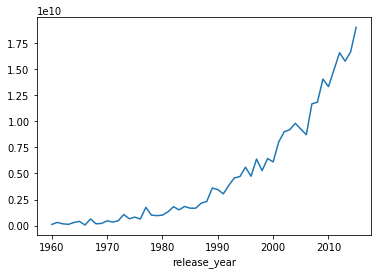

In [123]:
#Profit Analysis
#To perform profit analysis we need to determine the profit generated from each movie. This can be calculated as below
Movies['Profit Value'] = Movies['revenue']-Movies['budget']
Movies.groupby('release_year').sum()['Profit Value'].plot()

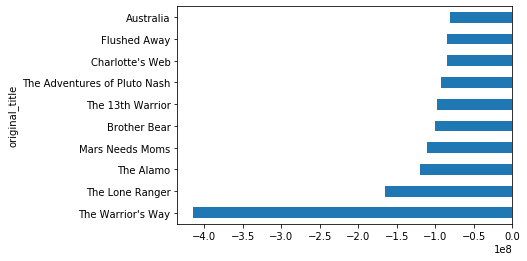

In [129]:
#Top 10 movies with the highest gross profit
Movies['Profit Value'] = Movies['revenue']-Movies['budget']
Movies.groupby('original_title').sum()['Profit Value'].sort_values()[:10].plot(kind='barh')

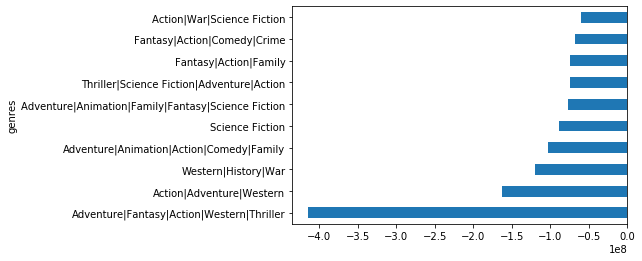

In [131]:
#Revenue Analysis based on Genre
Movies['Profit Value'] = Movies['revenue']-Movies['budget']
Movies.groupby('genres').sum()['Profit Value'].sort_values()[:10].plot(kind='barh')